# Análisis de Riesgo Crediticio Utilizando Técnicas de Inteligencia Artificial

## Autores
- Juan Sebastián Otero Vega - 2220053
- Farid Camilo Rojas Vargas - 2220051
- Juan Manuel Ramírez Salamanca - 2192279

# Objetivo
Desarrollar y evaluar modelos de aprendizaje automático supervisado y no supervisado para clasificar el riesgo crediticio de los solicitantes (bueno o malo), basándose en un conjunto de atributos. Se busca identificar los factores determinantes y predecir el incumplimiento para optimizar decisiones financieras.

#Motivación
El riesgo crediticio es un problema crucial en la banca y las finanzas, en Colombia el 75% de la población adulta tiene acceso a crédito, lo que equivale a 33.2 millones de personas, según un estudio de DataCrédito Experian. Escoger este tema permite crear herramientas que dan un mejor tratamiento de informacion basado en Inteligencia Artificial en un contexto real y relevante, el cual incluso podria se extrapolado a la población de nuestro entorno, donde una mala decisión puede implicar pérdidas económicas significativas. La motivación principal es mejorar la toma de decisiones al predecir la probabilidad de incumplimiento de pago por parte de los clientes.



# Información del Dataset

Nombre: German Credit Data

Fuente: UCI Machine Learning Repository (OpenML ID: 31)

Autor: Dr. Hans Hofmann

Año: 1994

DOI: 10.24432/C5NC77

Hofmann, H. (1994). Statlog (German Credit Data) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5NC77.

Descripción: Clasifica a personas como de buen o mal riesgo crediticio basado en sus características personales y financieras.

Matriz de Costos:

```
                Malo (Predicho)	Bueno (Predicho)
Malo (Actual)	      0	                5
Bueno (Actual)	     1	                0

```
Clasificar incorrectamente a un cliente malo como bueno tiene un costo mayor,cuando es malo (costo 5), que clasificar a un cliente como malo cuando es bueno (costo 1).

## Descripción Detallada de las Columnas del Dataset

| **Columna**              | **Tipo**      | **Descripción** |
|--------------------------|---------------|-----------------|
| `checking_status`        | Categórica    | Estado de la cuenta corriente del cliente. Ej: "<0", "0<=X<200", ">=200", "no checking". Indica solvencia. |
| `duration`               | Numérica      | Duración del crédito en meses. Créditos largos pueden implicar mayor riesgo. |
| `credit_history`         | Categórica    | Historial crediticio. Ej: "all paid", "existing paid", "critical/other". Refleja comportamiento financiero pasado. |
| `purpose`                | Categórica    | Propósito del préstamo. Ej: "radio/tv", "new car", "education", "furniture". |
| `credit_amount`          | Numérica      | Monto total solicitado por el cliente. |
| `savings_status`         | Categórica    | Estado de cuenta de ahorros. Ej: "<100", "500<=X<1000", "no known savings". |
| `employment`             | Categórica    | Años de empleo en el trabajo actual. Ej: ">=7", "1<=X<4", "unemployed". |
| `installment_commitment`| Numérica      | Porcentaje del ingreso mensual destinado al pago del préstamo. |
| `personal_status`        | Categórica    | Género y estado civil. Ej: "male single", "female div/dep/mar". |
| `other_parties`          | Categórica    | Otros garantes o co-solicitantes. Ej: "none", "guarantor", "co-applicant". |
| `residence_since`        | Numérica      | Años viviendo en la residencia actual. |
| `property_magnitude`     | Categórica    | Tipo de propiedad o activos. Ej: "real estate", "car", "no known property". |
| `age`                    | Numérica      | Edad del cliente. |
| `other_payment_plans`    | Categórica    | Otros planes de pago. Ej: "bank", "stores", "none". |
| `housing`                | Categórica    | Tipo de vivienda. Ej: "own", "rent", "for free". |
| `existing_credits`       | Numérica      | Número de créditos existentes en otras instituciones. |
| `job`                    | Categórica    | Tipo de trabajo. Ej: "skilled", "unskilled", "highly skilled". |
| `num_dependents`         | Numérica      | Número de dependientes económicos. |
| `own_telephone`          | Categórica    | Si el cliente posee teléfono propio ("yes" o "none"). |
| `foreign_worker`         | Categórica    | Si es un trabajador extranjero ("yes" o "no"). |
| `class`                  | Categórica    | Variable objetivo: "good" (crédito confiable) o "bad" (riesgo crediticio alto). |



#Características Numéricas


* duration – Meses de duración del crédito.

* credit_amount – Monto total del crédito solicitado.

* installment_commitment – Porcentaje de ingreso dedicado al crédito.

* residence_since – Años viviendo en la residencia actual.

* age – Edad del cliente.

* existing_credits – Número de créditos activos en otras instituciones.

* num_dependents – Número de dependientes económicos.

#Características Categóricas

* checking_status – Estado de cuenta corriente.

* credit_history – Historial crediticio.

* purpose – Propósito del préstamo.

* savings_status – Estado de cuenta de ahorros.

* employment – Años de empleo.

* personal_status – Estado civil y género.

* other_parties – Otros garantes o fiadores.

* property_magnitude – Tipo de propiedad o activo.

* other_payment_plans – Otros planes de pago existentes.

* housing – Tipo de vivienda.

* job – Tipo de empleo.

* own_telephone – Si tiene teléfono propio.

* foreign_worker – Si es trabajador extranjero.

* class – (Variable objetivo): bueno / malo.



In [ ]:
%%capture
!pip install -U scikit-learn # Asegúrate de tener la última versión para fetch_openml
!pip install tensorflow

In [ ]:
#@title **Imports**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Configuraciones para visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **Cargar el dataset desde OpenML**

In [ ]:
credit_g = fetch_openml(data_id=31, as_frame=True, parser='auto')
df = credit_g.frame
target = credit_g.target
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14

# **Preprocesamiento y Análisis Estadístico**

No se cambió el dataset original, pero se realizó una limpieza, codificación de variables categóricas y escalamiento de las variables numéricas. Se aseguraron de que todos los datos estuvieran listos para su uso en modelos de Machine Learning.

In [ ]:
print("\nDescripción estadística de las características numéricas:")
print(df.describe())


Descripción estadística de las características numéricas:
          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000

In [ ]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
print("\nValores NaN por columna:")
print(df.isna().sum())


Valores NaN por columna:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
# Verificar los valores de la columna 'class'
print("Valores únicos en la columna 'class' antes del preprocesamiento:")
print(df['class'].value_counts())

# Convertir la variable objetivo a numérica
# Mapearemos a 1 (good) y 0 (bad).
df['class'] = df['class'].apply(lambda x: 1 if x == 'good' else 0)

print("\nValores únicos en la columna 'class' después del preprocesamiento:")
print(df['class'].value_counts())

#Definimos X y ground truth

X = df.drop('class', axis=1)
y = df['class']

Valores únicos en la columna 'class' antes del preprocesamiento:
class
good    700
bad     300
Name: count, dtype: int64

Valores únicos en la columna 'class' después del preprocesamiento:
class
1    700
0    300
Name: count, dtype: int64


In [ ]:
# Identificar caracteristicas categoricas y numericas

categorical_features = X.select_dtypes(include=['category', 'object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Características Categóricas ({len(categorical_features)}): {list(categorical_features)}")
print(f"Características Numéricas ({len(numerical_features)}): {list(numerical_features)}")

Características Categóricas (13): ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
Características Numéricas (7): ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


In [ ]:
# Usamos ColumnTransformer para aplicarle un preprocesamiento a las caracteristicas categoricas y numericas a la vez,
# para las numericas usamos el clásico Standard Scaler, de esta forma tendran un comportamiento mas cercano al de una
# distribucion normal. Para las categoricas usamos OneHotEncoder, el cual las convierte a un formato numerico creando
# una columna binaria para cada categoria unica de la columna categorica.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features) # drop='first' para evitar multicolinealidad
    ])

# Especificamos handle_unknown='ignore' para que si durante la transformación se encuentran categorias desconocidas,
# entonces las columnas codificadas para estas caracteristicas sean todo 0.

# La multicolinealidad pasa cuando dos o más caracteristicas estan altamente correlacionadas linealmente, como el OneHotEncoder crea
# columnas binarias para cadacategoria, esto hace que se cree una relacion lineal perfecta entre las nuevas columnas creadas, nacidas
# de una columna categorica especifica. Por ejemplo, si una columna Calidad tiene valores Bueno,Medio,Malo entonces al hacerse el
# OneHotEncoder y crearse columnas binarias como CalidadBueno,CalidadMedio,CalidadMalo, provocara que se puedan conocer los valores de
# CalidadBueno (por ejemplo), si se conocen los valores de CalidadMedio y CalidadMalo. Entonces al usar drop='first', eliminamos la
# primera columna,  asegurando que ninguna de las nuevas columnas binarias pueda ser exactamente predicha por una
# combinación lineal de las otras.

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Obtener los nombres de las nuevas columnas después del OneHotEncoding

feature_names_out = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=feature_names_out)

print("\nDimensiones de X después del preprocesamiento:", X_processed_df.shape)
X_processed_df.head()


Dimensiones de X después del preprocesamiento: (1000, 48)


,num__duration,num__credit_amount,num__installment_commitment,num__residence_since,num__age,num__existing_credits,num__num_dependents,cat__checking_status_<0,cat__checking_status_>=200,cat__checking_status_no checking,...,cat__property_magnitude_real estate,cat__other_payment_plans_none,cat__other_payment_plans_stores,cat__housing_own,cat__housing_rent,cat__job_skilled,cat__job_unemp/unskilled non res,cat__job_unskilled resident,cat__own_telephone_yes,cat__foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (800, 48)
X_test: (200, 48)
y_train: (800,)
y_test: (200,)


# **Estadísticas**

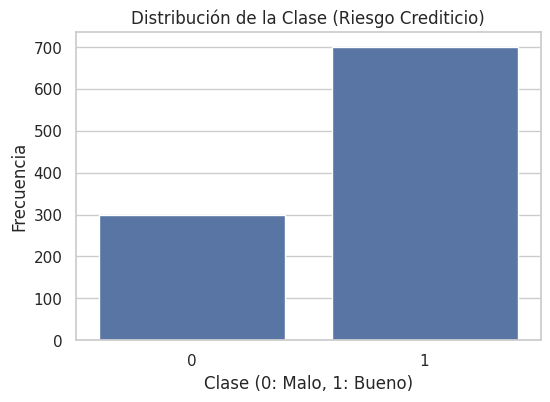

class
1    0.7
0    0.3
Name: proportion, dtype: float64


In [ ]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribución de la Clase (Riesgo Crediticio)')
plt.xlabel('Clase (0: Malo, 1: Bueno)')
plt.ylabel('Frecuencia')
plt.show()
print(y.value_counts(normalize=True))
#El dataset está desbalanceado, con un 70% de créditos clasificados como buenos y un 30% como malos. Esto es importante tenerlo en cuenta para la evaluación de modelos.

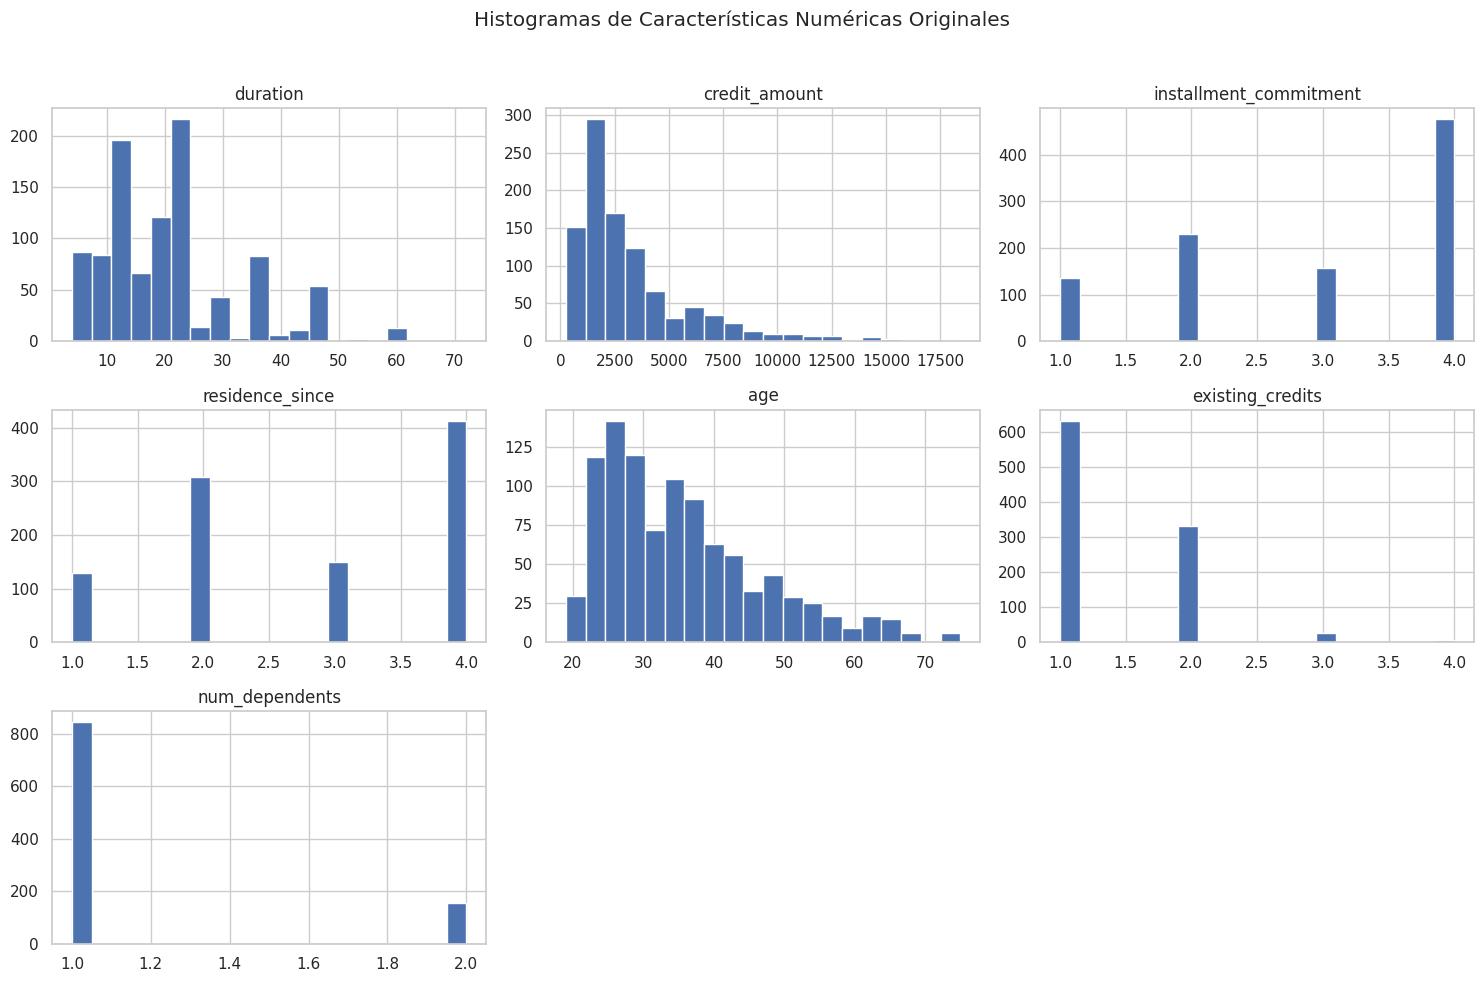

In [ ]:
# Histogramas para características numéricas originales (antes del StandardScaler)
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Características Numéricas Originales')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

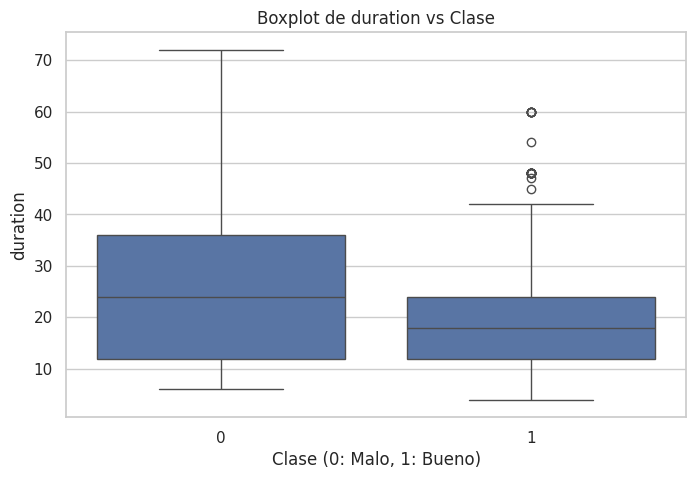

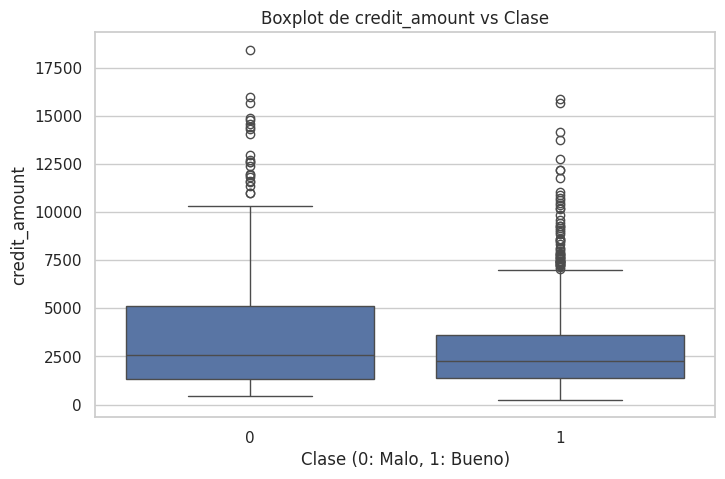

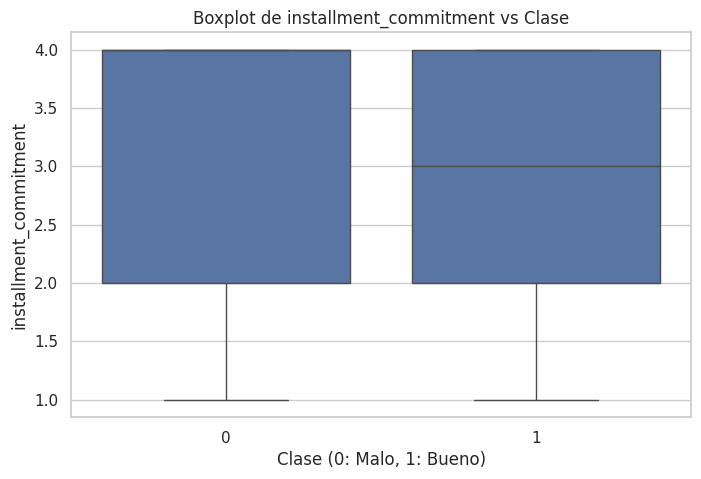

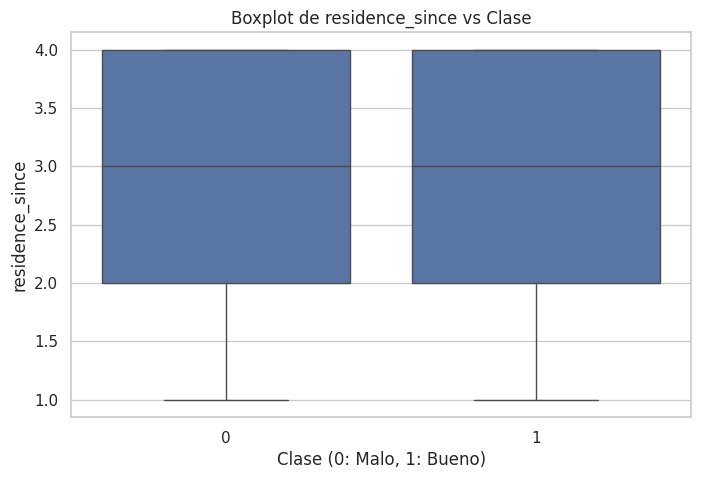

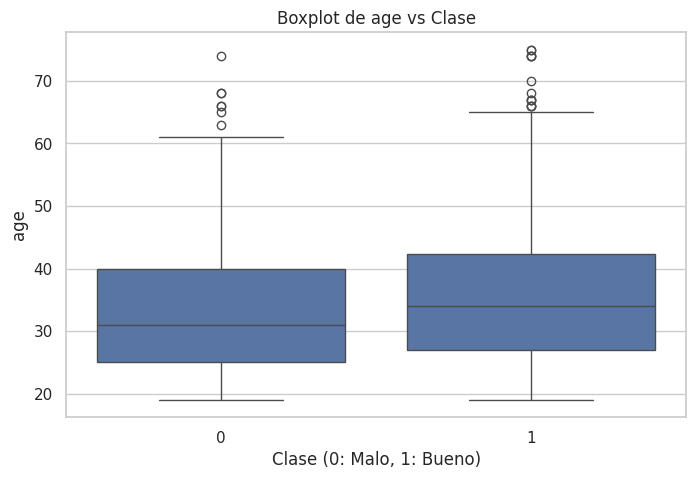

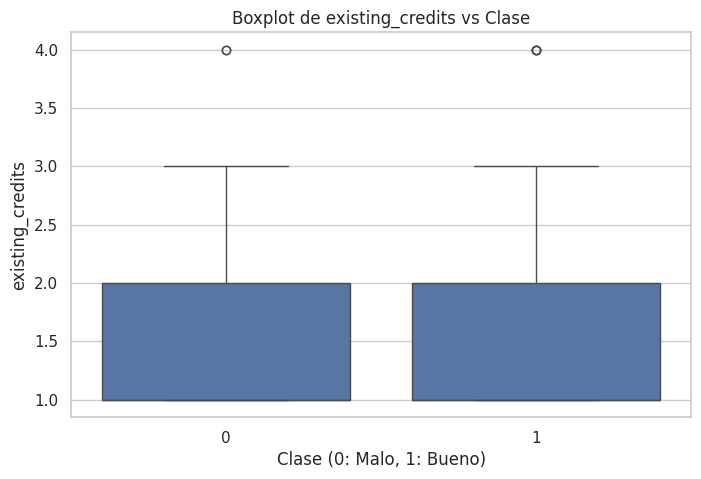

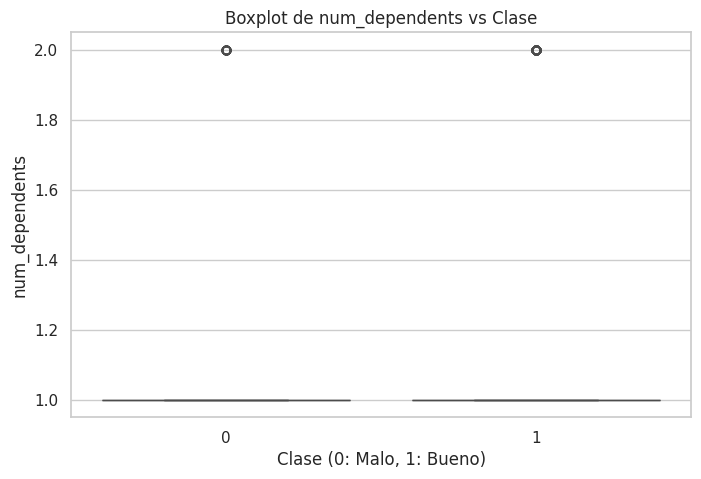

In [ ]:
# Boxplots para características numéricas originales vs Clase
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['class'], y=df[col])
    plt.title(f'Boxplot de {col} vs Clase')
    plt.xlabel('Clase (0: Malo, 1: Bueno)')
    plt.show()

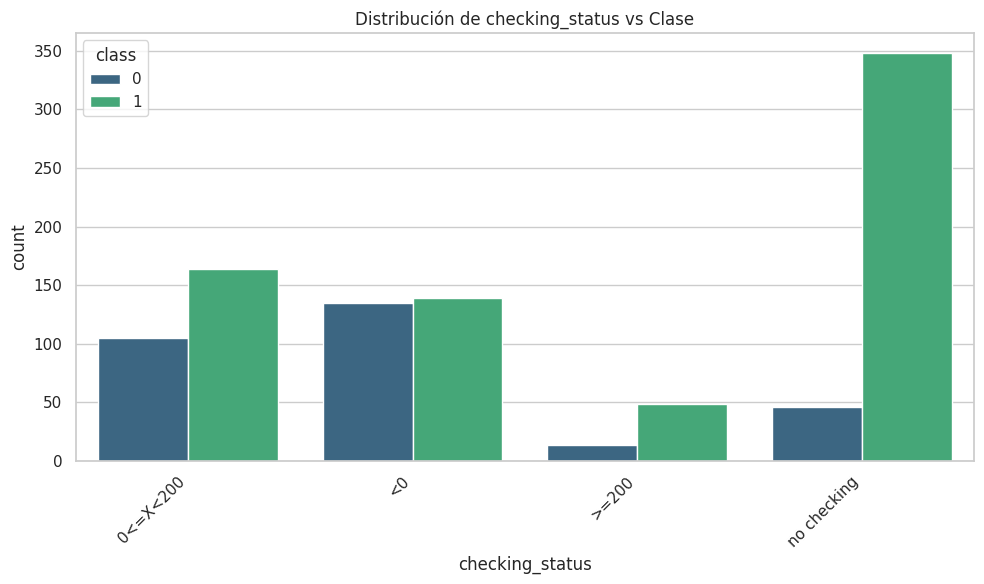

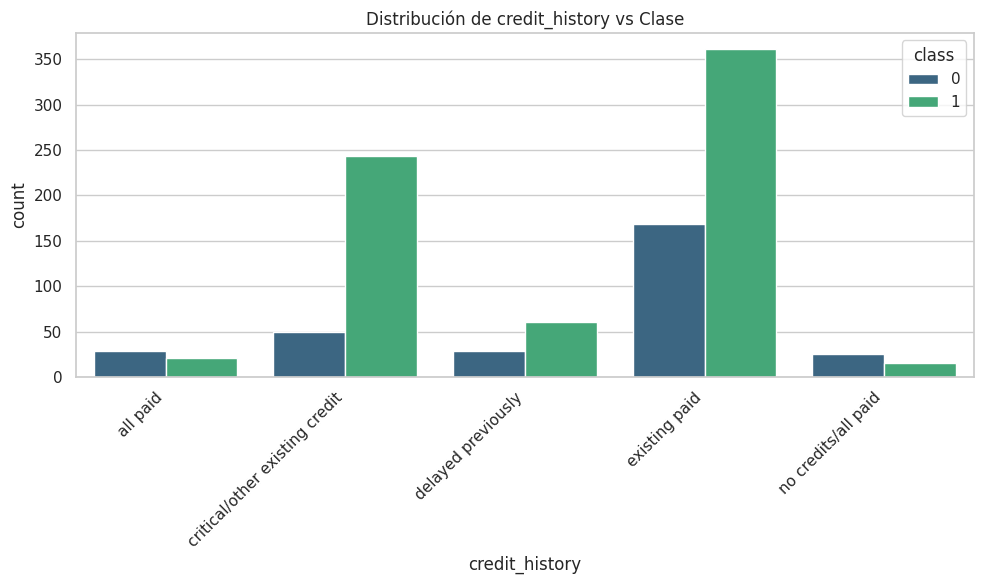

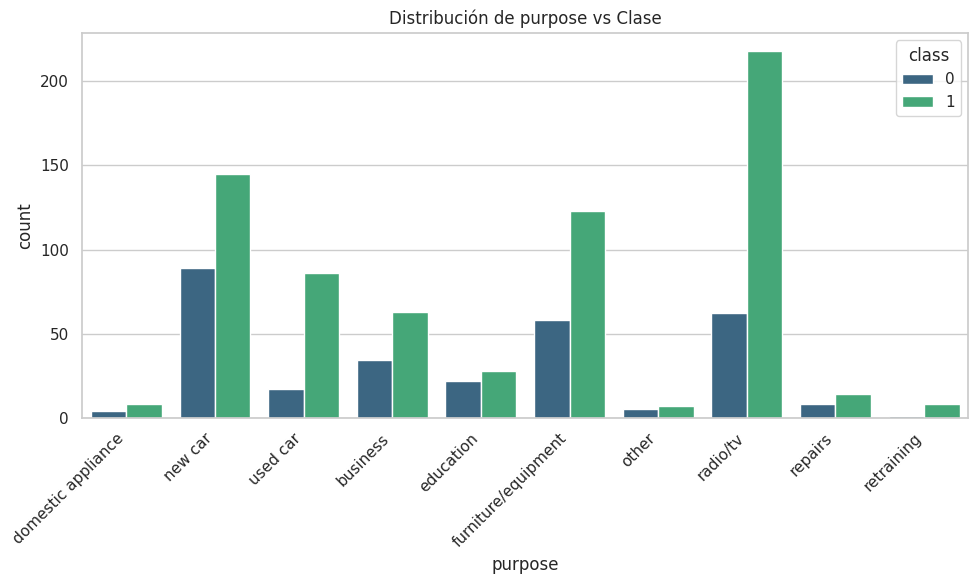

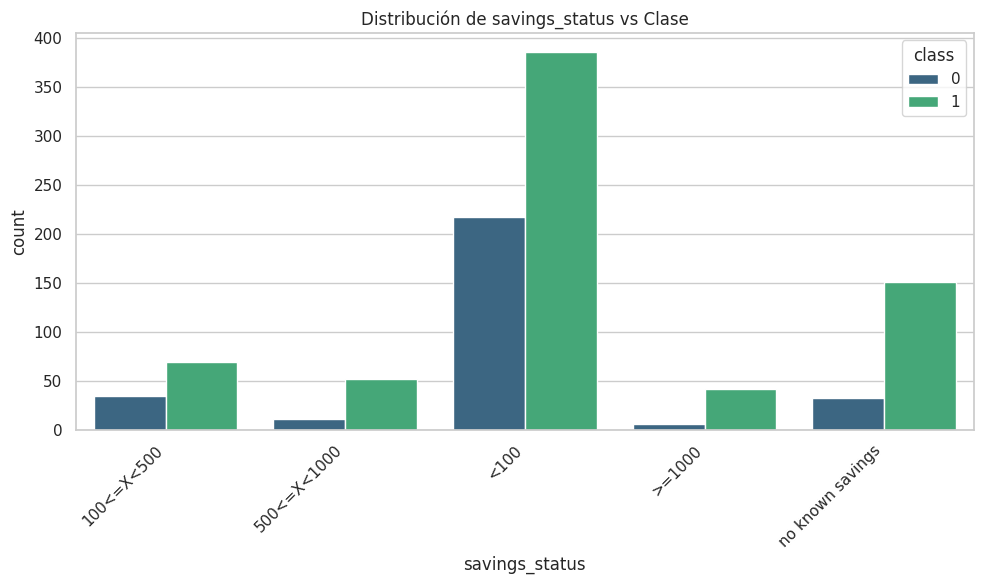

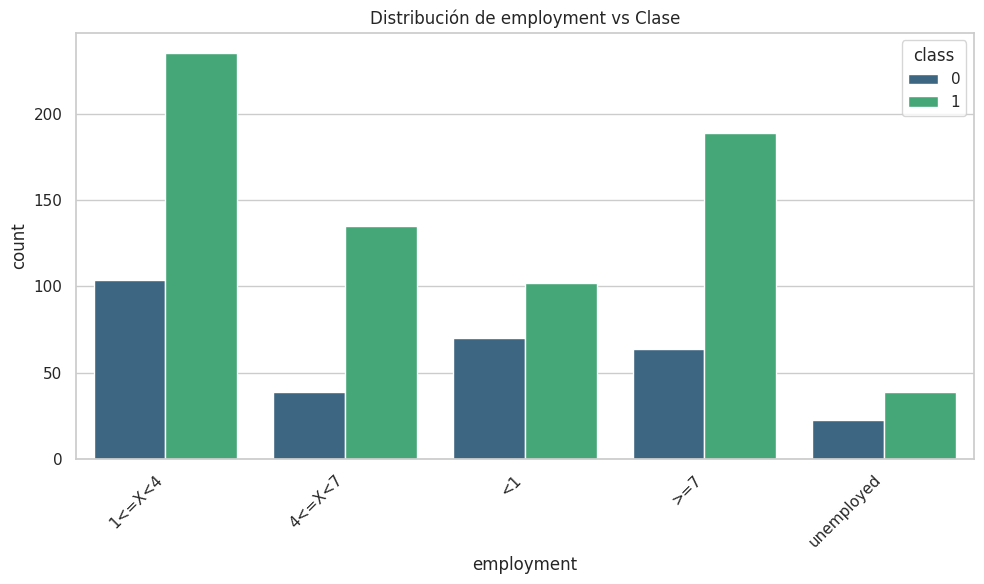

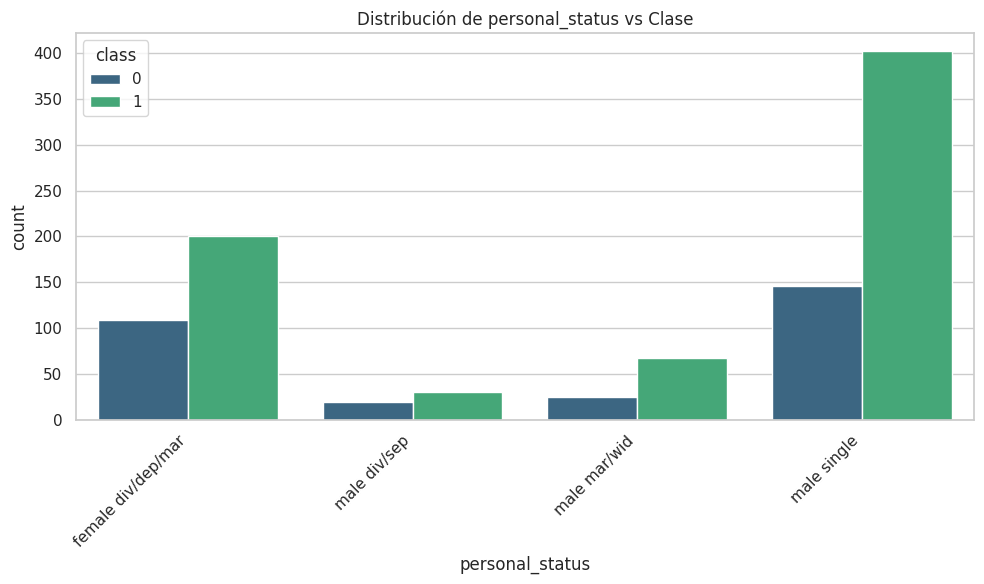

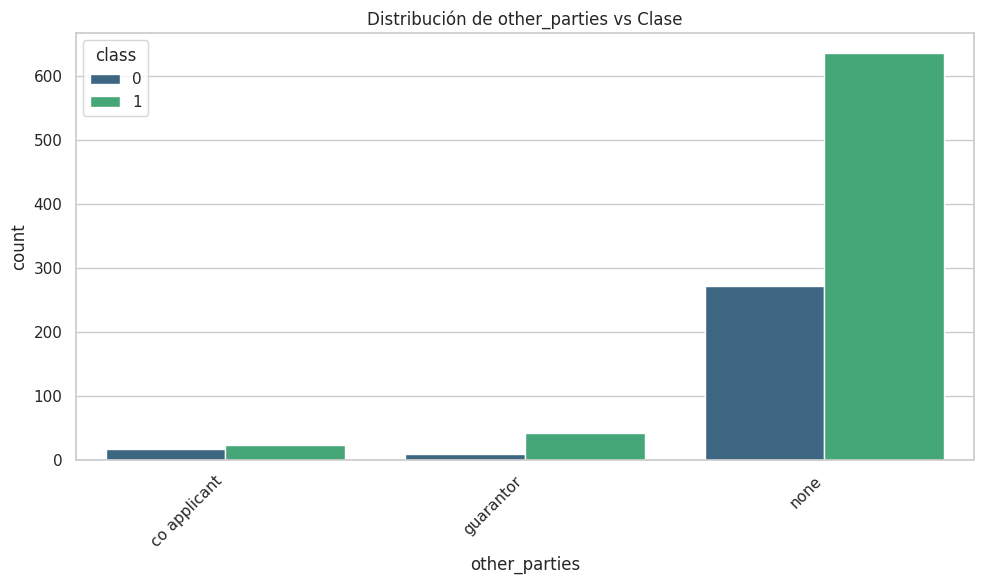

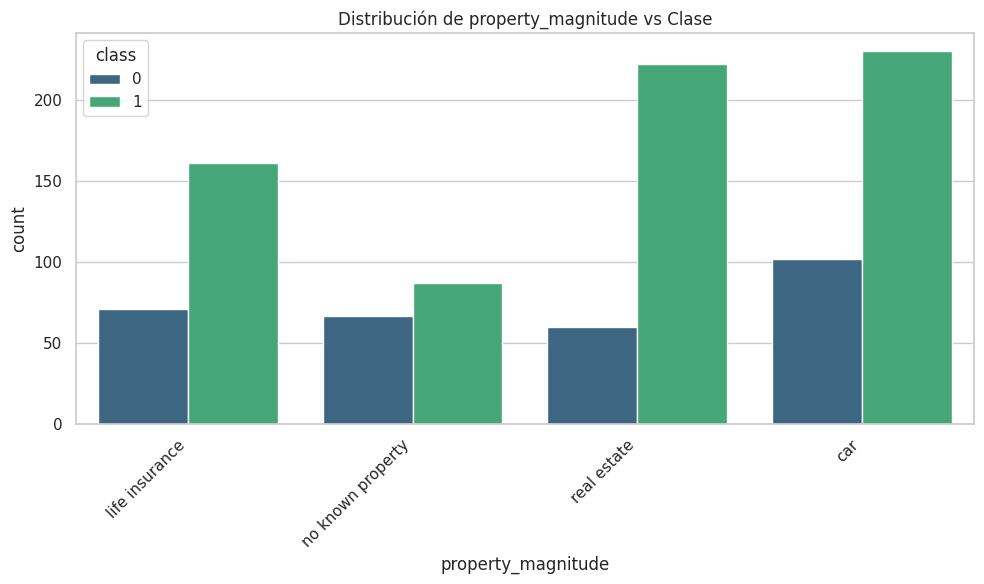

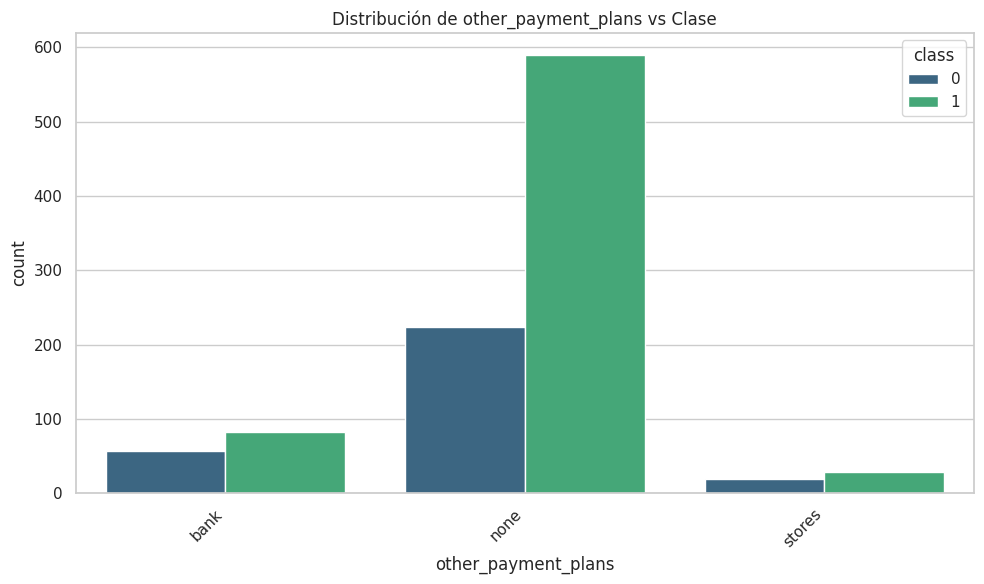

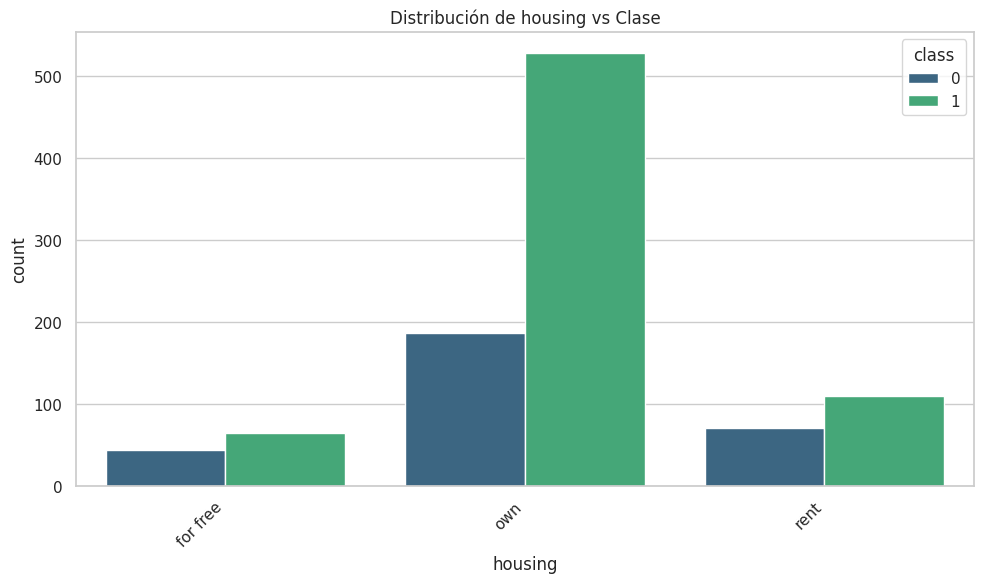

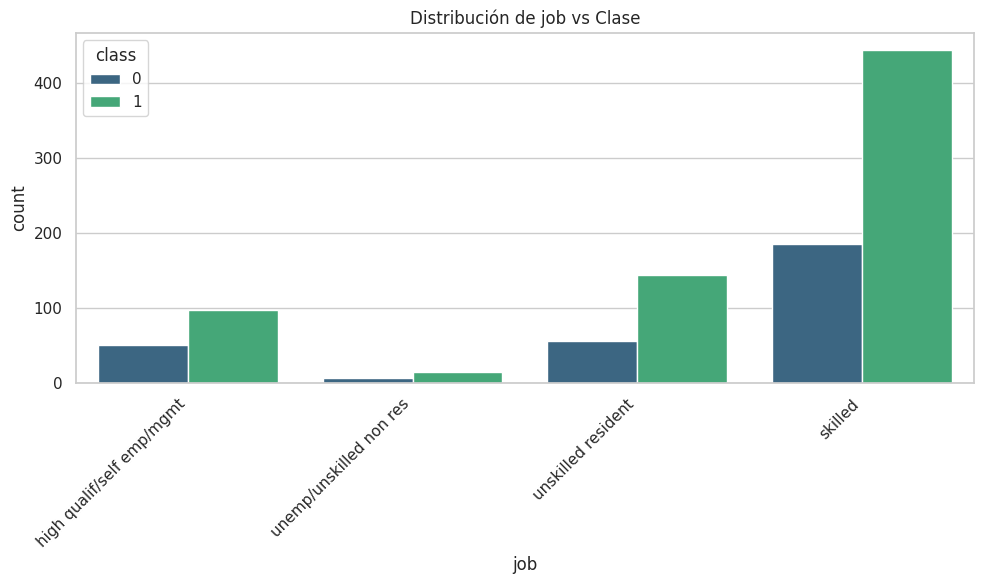

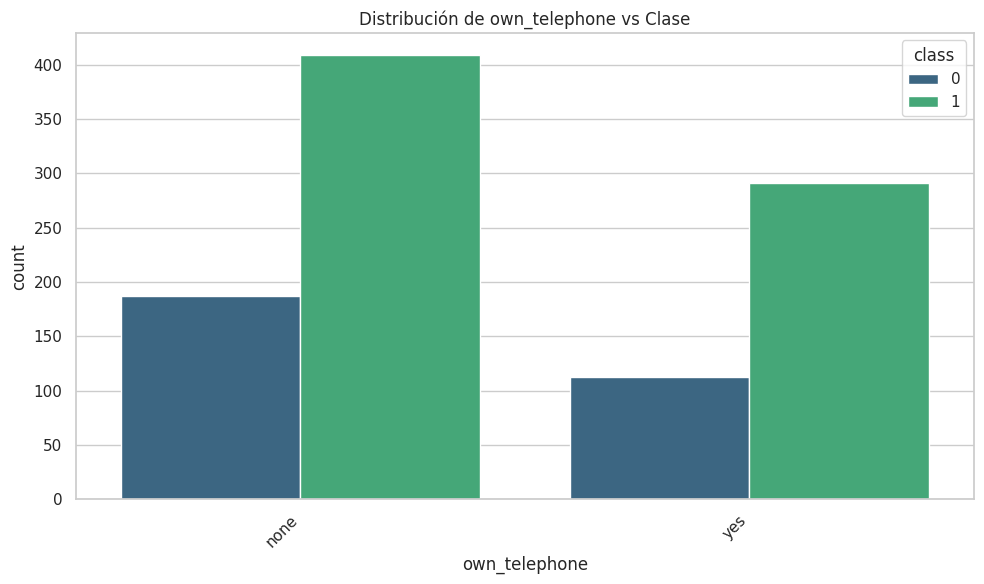

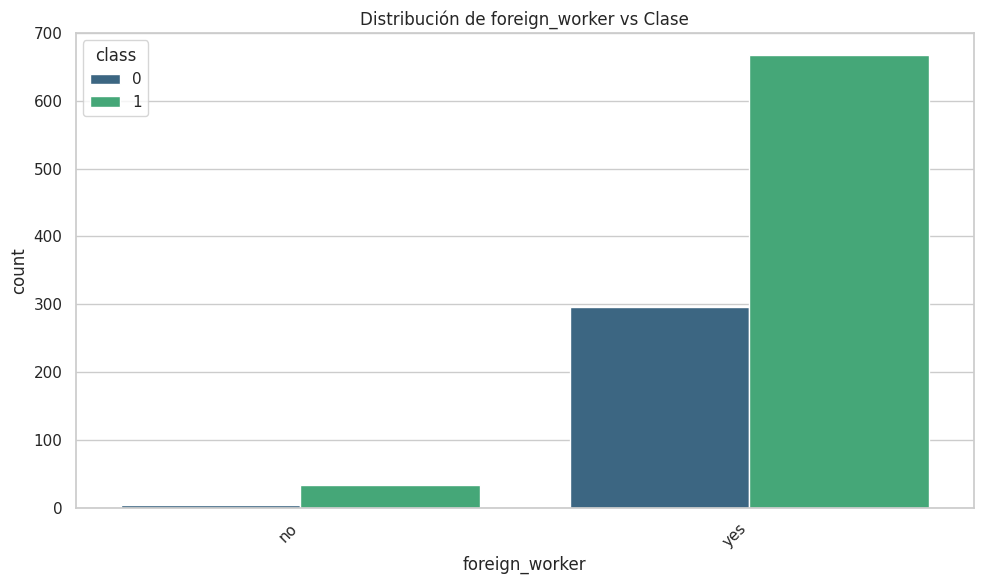

In [ ]:
# Diagramas de barras para características categóricas originales vs Clase
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=df['class'], data=df, palette='viridis')
    plt.title(f'Distribución de {col} vs Clase')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

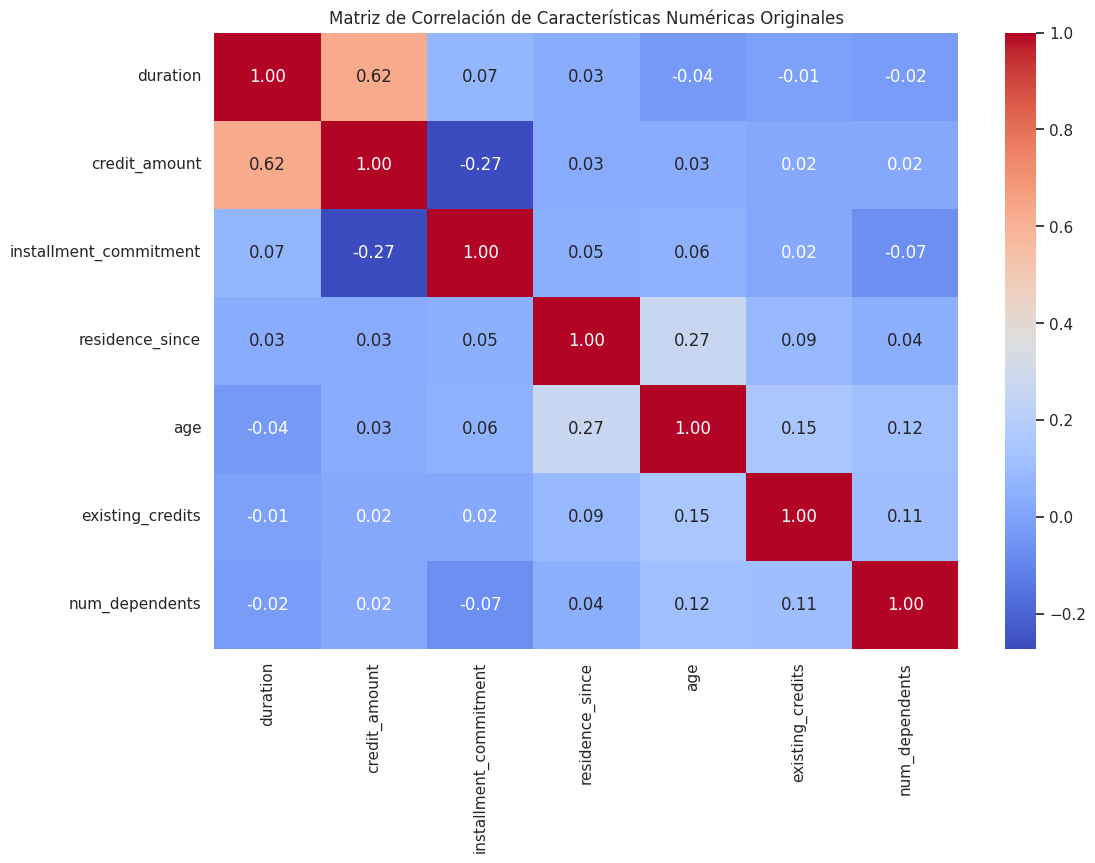

In [ ]:
# Matriz de correlación para las características numéricas originales
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Numéricas Originales')
plt.show()

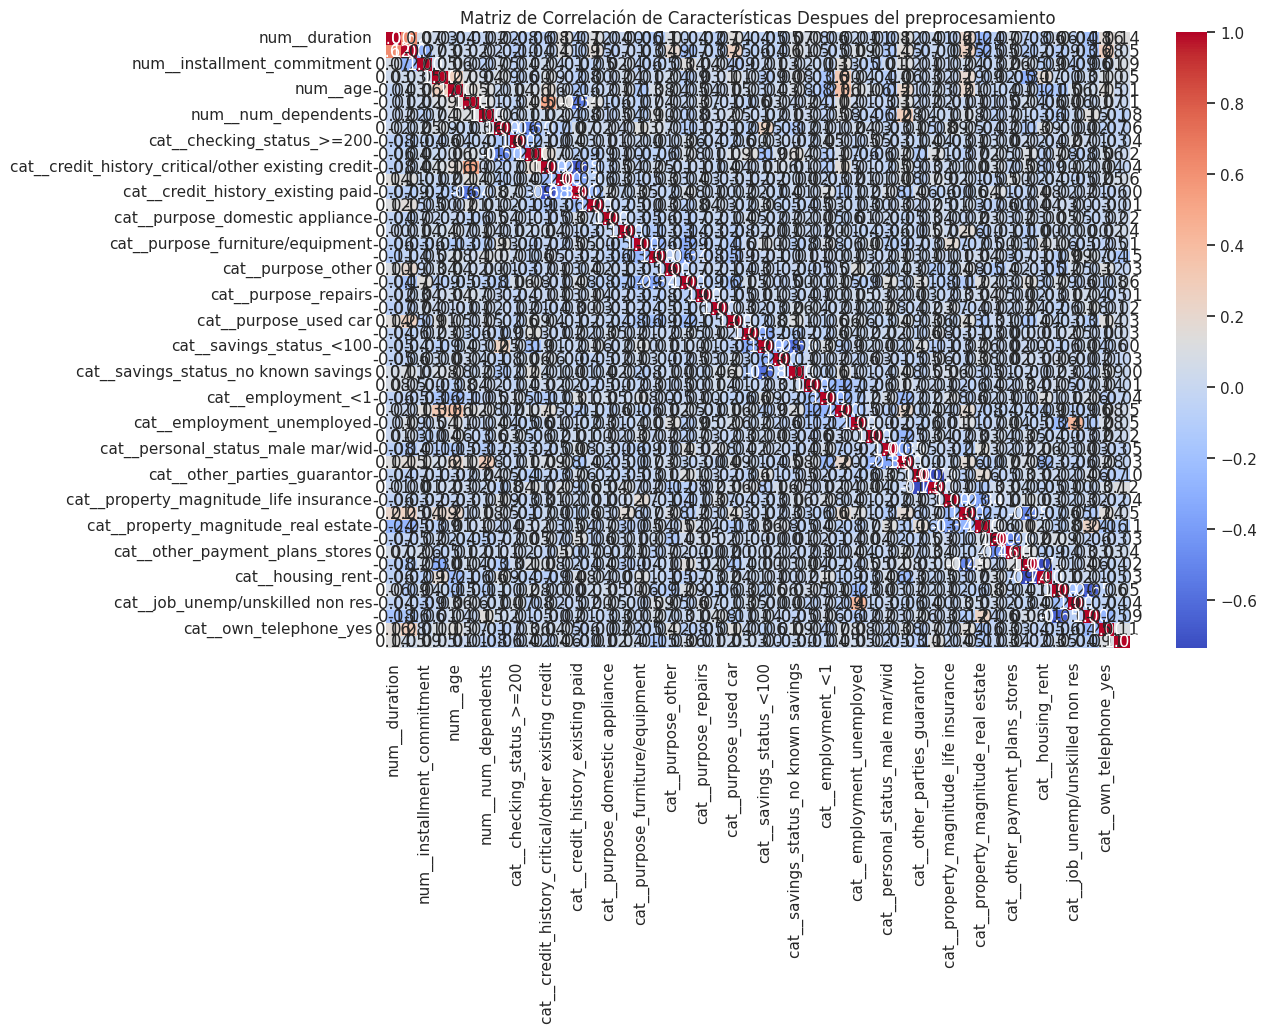

In [ ]:
# Matriz de correlación para las características despues del preprocesamiento
plt.figure(figsize=(12, 8))
correlation_matrix2 = X_processed_df.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Despues del preprocesamiento')
plt.show()

<Figure size 1500x1200 with 0 Axes>

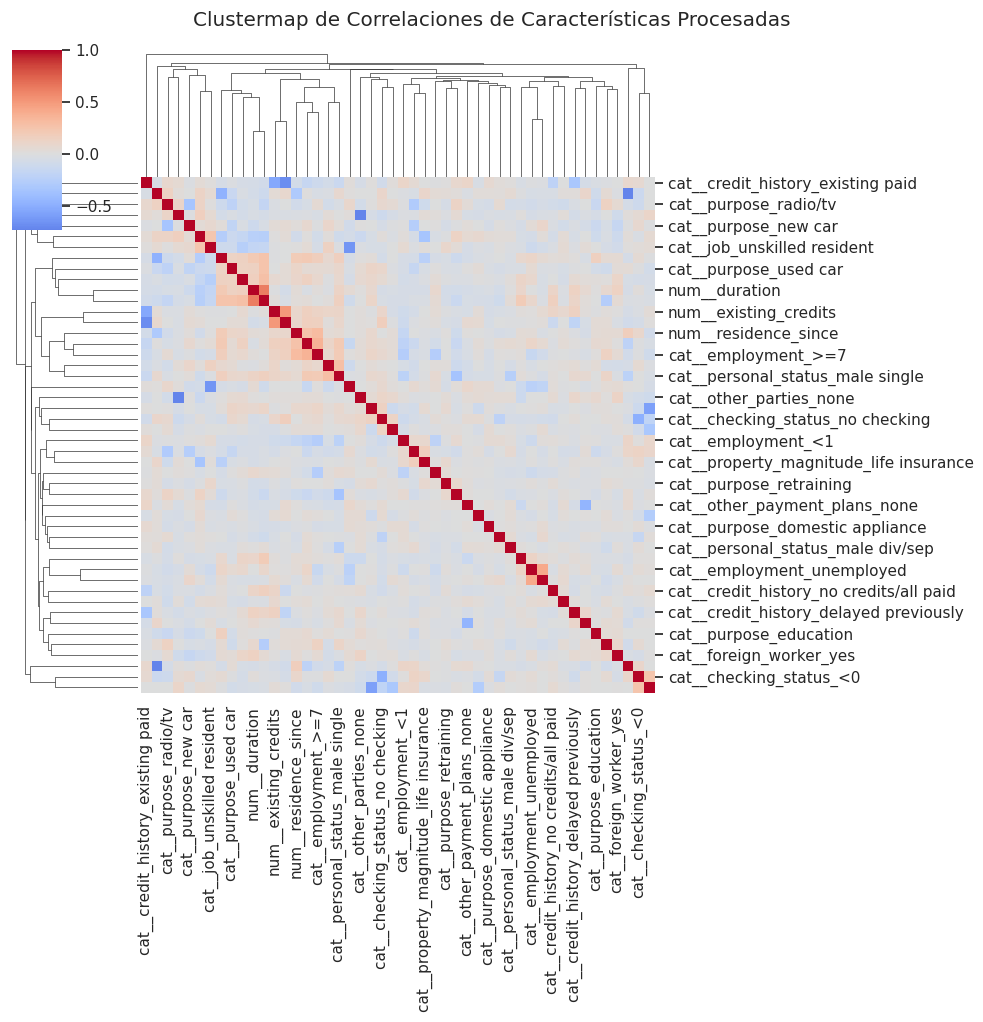

In [ ]:
# Calcular la matriz de correlación
correlation_matrix_processed = X_processed_df.corr()

# Visualizar mejor las relaciones de las características despues del preprocesamiento usando clustermap
# Un clustermap reorganiza las filas y columnas de la matriz de correlación para agrupar características similares, lo que puede ayudar a revelar patrones.
plt.figure(figsize=(15, 12))
sns.clustermap(correlation_matrix_processed, cmap='coolwarm', annot=False, center=0)
plt.suptitle('Clustermap de Correlaciones de Características Procesadas', y=1.02)
plt.show()

# **Aprendizaje Supervisado**

## ML

In [ ]:
model_metrics = {} # Diccionario global para almacenar métricas

def get_model_evaluation_metrics(model_instance, X_train_data, y_train_data, X_test_data, y_test_data, model_name_for_print="Modelo"):
    model_instance.fit(X_train_data, y_train_data)
    y_pred = model_instance.predict(X_test_data)

    accuracy_val = accuracy_score(y_test_data, y_pred)
    precision_val = precision_score(y_test_data, y_pred, pos_label=1, zero_division=0)
    balanced_recall_val = recall_score(y_test_data, y_pred, average='macro', zero_division=0)

    metrics_dict = {
        "Balanced Recall (Macro Recall)": balanced_recall_val,
        "Accuracy": accuracy_val,
        "Precision": precision_val,
        "confusion_matrix_obj": confusion_matrix(y_test_data, y_pred),
        "y_pred_obj": y_pred
    }

    print(f"Métricas para {model_name_for_print}:")
    print(f"  Accuracy: {metrics_dict['Accuracy']:.4f}")
    print(f"  Precision: {metrics_dict['Precision']:.4f}")
    print(f"  Balanced Recall (Macro Recall): {metrics_dict['Balanced Recall (Macro Recall)']:.4f} <--- Métrica Principal")
    print(f"  Confusion Matrix:\n{metrics_dict['confusion_matrix_obj']}")
    print(f"  Classification Report:\n",classification_report(y_test_data, y_pred, zero_division=0, target_names=['Bad Risk (0)', 'Good Risk (1)']))
    print("-" * 50)
    return metrics_dict


In [ ]:
#Random Forest
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # class_weight para desbalanceo
#trained_rf = evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test)
rf_direct_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_metrics["Random Forest"] = get_model_evaluation_metrics(rf_direct_model, X_train, y_train, X_test, y_test, "Random Forest (Directo)")

#SVC
#svc_model = SVC(random_state=42, class_weight='balanced')
#trained_svc = evaluate_model("SVC", svc_model, X_train, y_train, X_test, y_test)
svc_direct_model = SVC(probability=True, random_state=42, class_weight='balanced')
model_metrics["SVC"] = get_model_evaluation_metrics(svc_direct_model, X_train, y_train, X_test, y_test, "SVC (Directo)")

Métricas para Random Forest (Directo):
  Accuracy: 0.7400
  Precision: 0.7683
  Balanced Recall (Macro Recall): 0.6333 <--- Métrica Principal
  Confusion Matrix:
[[ 22  38]
 [ 14 126]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.61      0.37      0.46        60
Good Risk (1)       0.77      0.90      0.83       140

     accuracy                           0.74       200
    macro avg       0.69      0.63      0.64       200
 weighted avg       0.72      0.74      0.72       200

--------------------------------------------------
Métricas para SVC (Directo):
  Accuracy: 0.7000
  Precision: 0.8509
  Balanced Recall (Macro Recall): 0.7048 <--- Métrica Principal
  Confusion Matrix:
[[43 17]
 [43 97]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.50      0.72      0.59        60
Good Risk (1)       0.85      0.69      0.76       140

     accuracy                           0

## DL

In [ ]:
def get_dnn_evaluation_metrics(dnn_model_creator_func, input_dim, X_train_data, y_train_data, X_test_data, y_test_data, model_name_for_print="DNN", epochs=50, batch_size=32):
    keras_model = dnn_model_creator_func(input_dim)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    keras_model.fit(X_train_data, y_train_data, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0, callbacks=[early_stopping])
    y_pred_proba = keras_model.predict(X_test_data, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    accuracy_val = accuracy_score(y_test_data, y_pred)
    precision_val = precision_score(y_test_data, y_pred, pos_label=1, zero_division=0)
    balanced_recall_val = recall_score(y_test_data, y_pred, average='macro', zero_division=0)

    metrics_dict = {
        "Balanced Recall (Macro Recall)": balanced_recall_val,
        "Accuracy": accuracy_val,
        "Precision": precision_val,
        "confusion_matrix_obj": confusion_matrix(y_test_data, y_pred),
        "y_pred_obj": y_pred
    }

    print(f"Métricas para {model_name_for_print}:")
    print(f"  Accuracy: {metrics_dict['Accuracy']:.4f}")
    print(f"  Precision: {metrics_dict['Precision']:.4f}")
    print(f"  Balanced Recall (Macro Recall): {metrics_dict['Balanced Recall (Macro Recall)']:.4f} <--- Métrica Principal")
    print(f"  Confusion Matrix:\n{metrics_dict['confusion_matrix_obj']}")
    print(f"  Classification Report:\n",classification_report(y_test_data, y_pred, zero_division=0, target_names=['Bad Risk (0)', 'Good Risk (1)']))
    print("-" * 50)
    return metrics_dict

# DNN para características originales
def create_dnn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)), Dropout(0.3),
        Dense(64, activation='relu'), Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_dim_direct = X_train.shape[1]
model_metrics["DNN"] = get_dnn_evaluation_metrics(create_dnn_model, input_dim_direct, X_train.values, y_train.values, X_test, y_test, "DNN (Directa)")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Métricas para DNN (Directa):
  Accuracy: 0.7050
  Precision: 0.8000
  Balanced Recall (Macro Recall): 0.6607 <--- Métrica Principal
  Confusion Matrix:
[[ 33  27]
 [ 32 108]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.51      0.55      0.53        60
Good Risk (1)       0.80      0.77      0.79       140

     accuracy                           0.70       200
    macro avg       0.65      0.66      0.66       200
 weighted avg       0.71      0.70      0.71       200

--------------------------------------------------


# **Aprendizaje NO Supervisado**

## PCA

--- Aplicación y Visualización de PCA ---
Número de componentes para explicar el 95% de la varianza: 28
Varianza explicada por cada componente: [0.14319939 0.13162781 0.09967836 0.08786588 0.07506648 0.06275258
 0.03742706 0.0287841  0.02662088 0.02341378 0.02279352 0.01985223
 0.01904296 0.01858778 0.01664256 0.01592469 0.01534834 0.01409132
 0.01304938 0.01164193 0.01148755 0.00975565 0.00940026 0.00886071
 0.00833597 0.00775103 0.0071505  0.00594355]
Varianza total explicada: 0.9521


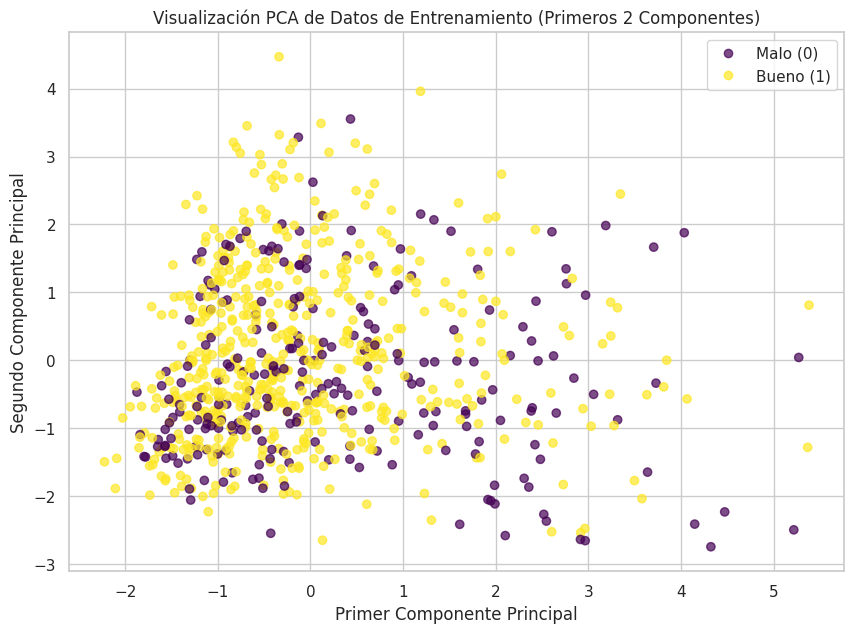


--- Evaluación de PCA mediante Clasificadores Supervisados (RF y SVC) ---
Evaluando PCA con 28 componentes.
Métricas para Random Forest en PCA:
  Accuracy: 0.7500
  Precision: 0.7711
  Balanced Recall (Macro Recall): 0.6405 <--- Métrica Principal
  Confusion Matrix:
[[ 22  38]
 [ 12 128]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.65      0.37      0.47        60
Good Risk (1)       0.77      0.91      0.84       140

     accuracy                           0.75       200
    macro avg       0.71      0.64      0.65       200
 weighted avg       0.73      0.75      0.73       200

--------------------------------------------------
Métricas para SVC en PCA:
  Accuracy: 0.7050
  Precision: 0.8522
  Balanced Recall (Macro Recall): 0.7083 <--- Métrica Principal
  Confusion Matrix:
[[43 17]
 [42 98]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.51      0.72      0.59     

In [ ]:
print("--- Aplicación y Visualización de PCA ---")
# Aplicar PCA para visualización y análisis de varianza (ej. 95% de varianza)
pca_visualization = PCA(n_components=0.95, random_state=42)
# El n_components=0.95 le indica al algoritmo que seleccione la menor cantidad de
# componentes principales que capturen al menos el 95% de la varianza presente en el dataser original.
X_train_pca_vis = pca_visualization.fit_transform(X_train)

print(f"Número de componentes para explicar el 95% de la varianza: {pca_visualization.n_components_}")
print(f"Varianza explicada por cada componente: {pca_visualization.explained_variance_ratio_}")
print(f"Varianza total explicada: {np.sum(pca_visualization.explained_variance_ratio_):.4f}")

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca_vis[:, 0], X_train_pca_vis[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización PCA de Datos de Entrenamiento (Primeros 2 Componentes)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Malo (0)', 'Bueno (1)'])
plt.show()


print("\n--- Evaluación de PCA mediante Clasificadores Supervisados (RF y SVC) ---")

# Usar el resultado de n_components=0.95
n_components_pca_eval = pca_visualization.n_components_
print(f"Evaluando PCA con {n_components_pca_eval} componentes.")
pca_eval = PCA(n_components=n_components_pca_eval, random_state=42)
X_train_pca_for_eval = pca_eval.fit_transform(X_train)
X_test_pca_for_eval = pca_eval.transform(X_test)

pca_metrics_options = {}
temp_model_storage_pca = {}

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
pca_metrics_options["PCA + RF"] = get_model_evaluation_metrics(rf_pca, X_train_pca_for_eval, y_train, X_test_pca_for_eval, y_test, "Random Forest en PCA")
temp_model_storage_pca["PCA + RF"] = rf_pca

svc_pca = SVC(probability=True, random_state=42, class_weight='balanced')
pca_metrics_options["PCA + SVC"] = get_model_evaluation_metrics(svc_pca, X_train_pca_for_eval, y_train, X_test_pca_for_eval, y_test, "SVC en PCA")
temp_model_storage_pca["PCA + SVC"] = svc_pca

pca_metrics = pca_metrics_options["PCA + SVC"]

pca_metrics["Source Classifier for Eval"] = "PCA + SVC"
pca_metrics["Num Components"] = X_train_pca_for_eval.shape[1]

model_metrics["PCA (evaluado)"] = pca_metrics

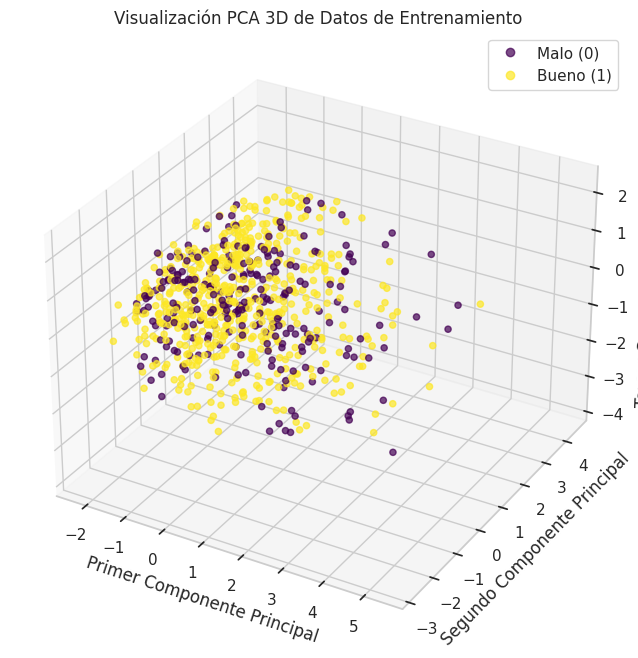

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

if pca_visualization.n_components_ >= 3:
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')

    scatter = ax.scatter3D(X_train_pca_vis[:, 0], X_train_pca_vis[:, 1], X_train_pca_vis[:, 2],
                           c=y_train, cmap='viridis', alpha=0.7)

    ax.set_xlabel('Primer Componente Principal')
    ax.set_ylabel('Segundo Componente Principal')
    ax.set_zlabel('Tercer Componente Principal')
    ax.set_title('Visualización PCA 3D de Datos de Entrenamiento')
    ax.legend(handles=scatter.legend_elements()[0], labels=['Malo (0)', 'Bueno (1)'])
    plt.show()
else:
    print("No hay suficientes componentes principales (menos de 3) para graficar en 3D.")

## TSNE

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


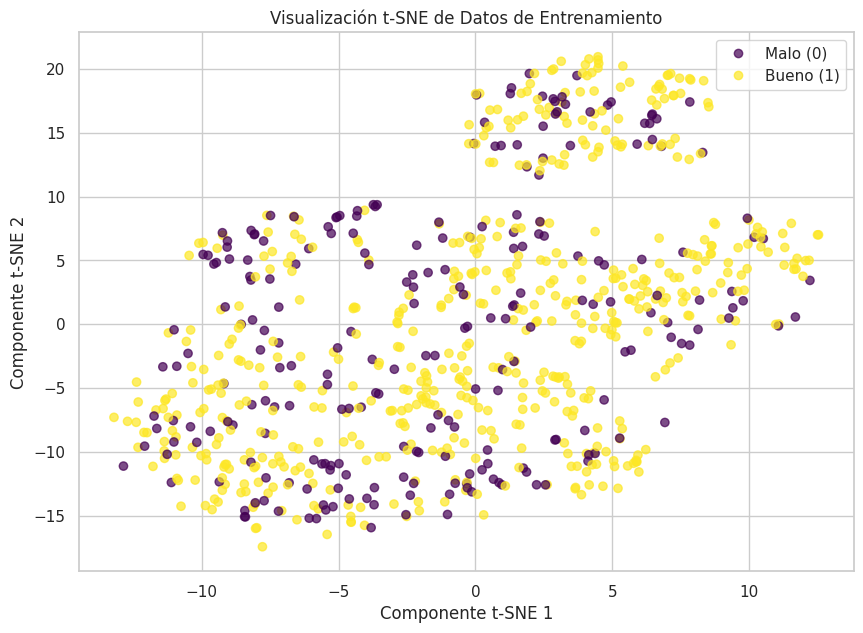


--- Evaluación de t-SNE mediante Clasificadores Supervisados (RF y SVC) ---
Aplicando t-SNE a 2 componentes para evaluación


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Datos transformados por t-SNE para evaluación.
Métricas para Random Forest en t-SNE:
  Accuracy: 0.6200
  Precision: 0.7025
  Balanced Recall (Macro Recall): 0.5048 <--- Métrica Principal
  Confusion Matrix:
[[ 13  47]
 [ 29 111]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.31      0.22      0.25        60
Good Risk (1)       0.70      0.79      0.74       140

     accuracy                           0.62       200
    macro avg       0.51      0.50      0.50       200
 weighted avg       0.58      0.62      0.60       200

--------------------------------------------------
Métricas para SVC en t-SNE:
  Accuracy: 0.6000
  Precision: 0.7113
  Balanced Recall (Macro Recall): 0.5190 <--- Métrica Principal
  Confusion Matrix:
[[ 19  41]
 [ 39 101]]
  Classification Report:
                precision    recall  f1-score   support

 Bad Risk (0)       0.33      0.32      0.32        60
Good Risk (1)       0.71      0.72      0.72    

In [ ]:
n_components_tsne_vis = 2
# Para visualización, es común usar una submuestra si el dataset es muy grande, en nuestro caso no parece ser necesario.

X_for_tsne_vis = X_train

tsne_visualization = TSNE(n_components=n_components_tsne_vis, random_state=42, perplexity=30, n_iter=350, init='pca', learning_rate='auto')
X_train_tsne_vis = tsne_visualization.fit_transform(X_for_tsne_vis)

plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(X_train_tsne_vis[:, 0], X_train_tsne_vis[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Visualización t-SNE de Datos de Entrenamiento')
plt.legend(handles=scatter_tsne.legend_elements()[0], labels=['Malo (0)', 'Bueno (1)'])
plt.show()


print("\n--- Evaluación de t-SNE mediante Clasificadores Supervisados (RF y SVC) ---")
n_components_tsne_eval = 2 # Usualmente 2 o 3 para t-SNE

# X_for_tsne_eval_train: datos de entrenamiento para ajustar t-SNE y luego el clasificador
# X_for_tsne_eval_test: datos de prueba para ajustar t-SNE y luego evaluar el clasificador
X_for_tsne_eval_train = X_train
X_for_tsne_eval_test = X_test

print(f"Aplicando t-SNE a {n_components_tsne_eval} componentes para evaluación")
tsne_transformer_train_eval = TSNE(n_components=n_components_tsne_eval, random_state=42, perplexity=30, n_iter=350, init='pca', learning_rate='auto')
X_train_tsne_for_eval = tsne_transformer_train_eval.fit_transform(X_for_tsne_eval_train)

tsne_transformer_test_eval = TSNE(n_components=n_components_tsne_eval, random_state=42, perplexity=30, n_iter=350, init='pca', learning_rate='auto')
X_test_tsne_for_eval = tsne_transformer_test_eval.fit_transform(X_for_tsne_eval_test) # t-SNE se re-ajusta para el test set en este enfoque
print(f"Datos transformados por t-SNE para evaluación.")

tsne_metrics_options = {}
temp_model_storage_tsne = {}

rf_tsne = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
tsne_metrics_options["t-SNE + RF"] = get_model_evaluation_metrics(rf_tsne, X_train_tsne_for_eval, y_train, X_test_tsne_for_eval, y_test, "Random Forest en t-SNE")
temp_model_storage_tsne["t-SNE + RF"] = rf_tsne

svc_tsne = SVC(probability=True, random_state=42, class_weight='balanced')
tsne_metrics_options["t-SNE + SVC"] = get_model_evaluation_metrics(svc_tsne, X_train_tsne_for_eval, y_train, X_test_tsne_for_eval, y_test, "SVC en t-SNE")
temp_model_storage_tsne["t-SNE + SVC"] = svc_tsne

# Añadir la mejor metrica al diccionario model_metrics para la comparación posterior

tsne_svc_metrics = tsne_metrics_options["t-SNE + SVC"]

tsne_svc_metrics["Source Classifier for Eval"] = "t-SNE + SVC"
tsne_svc_metrics["Num Components"] = X_train_tsne_for_eval.shape[1]

model_metrics["t-SNE (evaluado)"] = tsne_svc_metrics



--- Visualización t-SNE 3D ---
Aplicando t-SNE a 3 componentes para visualización 3D


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


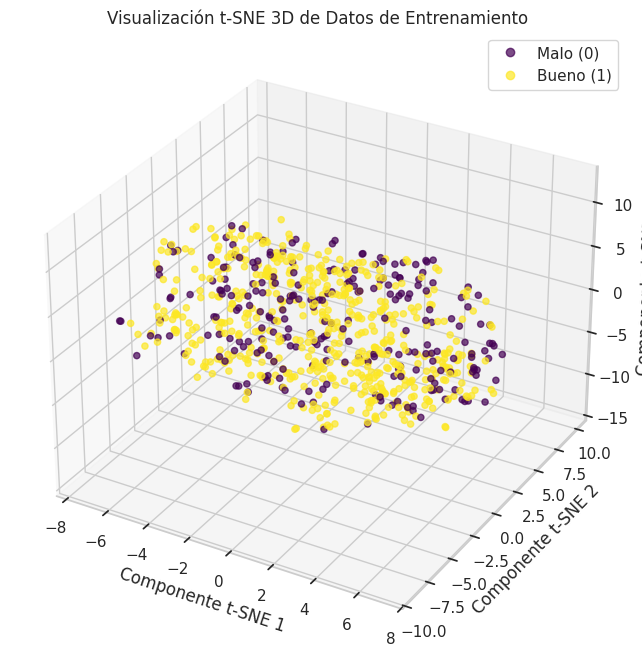

Visualización t-SNE 3D completa.


In [ ]:
import matplotlib.pyplot as plt
n_components_tsne_vis = 3 # Establecer a 3 para visualización 3D

X_for_tsne_vis_3d = X_train
y_for_tsne_vis_3d = y_train

print("\n--- Visualización t-SNE 3D ---")
print(f"Aplicando t-SNE a {n_components_tsne_vis} componentes para visualización 3D")

tsne_visualization_3d = TSNE(n_components=n_components_tsne_vis, random_state=42, perplexity=30, n_iter=350, init='pca', learning_rate='auto')
X_train_tsne_vis_3d = tsne_visualization_3d.fit_transform(X_for_tsne_vis_3d)

# Graficar el resultado de t-SNE en 3D
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

scatter_tsne_3d = ax.scatter3D(X_train_tsne_vis_3d[:, 0], X_train_tsne_vis_3d[:, 1], X_train_tsne_vis_3d[:, 2],
                               c=y_for_tsne_vis_3d, cmap='viridis', alpha=0.7)

ax.set_xlabel('Componente t-SNE 1')
ax.set_ylabel('Componente t-SNE 2')
ax.set_zlabel('Componente t-SNE 3')
ax.set_title('Visualización t-SNE 3D de Datos de Entrenamiento')
ax.legend(handles=scatter_tsne_3d.legend_elements()[0], labels=['Malo (0)', 'Bueno (1)'])
plt.show()

print("Visualización t-SNE 3D completa.")


# **Comparativa Métricas**

In [ ]:
all_metrics_list = []
for model_name_key, metrics_data in model_metrics.items():
    if not metrics_data: continue

    row = {
        "Modelo": model_name_key,
        "Balanced Recall (Macro Recall)": metrics_data.get("Balanced Recall (Macro Recall)", "N/A"),
        "Accuracy": metrics_data.get("Accuracy", "N/A"),
        "Precision": metrics_data.get("Precision", "N/A"),
        "Info Adicional": ""
    }

    if model_name_key in ["Random Forest", "SVC", "DNN"]:
        row["Tipo"] = "Supervisado"
    elif model_name_key == "PCA (evaluado)":
        row["Tipo"] = "No Supervisado (PCA)"
        source_clf_full = metrics_data.get('Source Classifier for Eval', 'N/D')
        source_clf_short = source_clf_full.split('+')[-1].strip() if '+' in source_clf_full else source_clf_full
        num_comp = metrics_data.get('Num Components', 'N/D')
        expl_var = metrics_data.get('Explained Variance', -1.0)
        expl_var_str = f"{expl_var:.2f}" if isinstance(expl_var, float) and expl_var != -1.0 else "N/D"
        row["Info Adicional"] = f"Vía {source_clf_short}; {num_comp} comps; Var.Expl: {expl_var_str}"
    elif model_name_key == "t-SNE (evaluado)":
        row["Tipo"] = "No Supervisado (t-SNE)"
        source_clf_full = metrics_data.get('Source Classifier for Eval', 'N/D')
        source_clf_short = source_clf_full.split('+')[-1].strip() if '+' in source_clf_full else source_clf_full
        num_comp = metrics_data.get('Num Components', 'N/D')
        row["Info Adicional"] = f"Vía {source_clf_short}; {num_comp} comps"

    all_metrics_list.append(row)

comparison_df = pd.DataFrame(all_metrics_list)
cols_order = ["Modelo", "Tipo", "Balanced Recall (Macro Recall)", "Accuracy", "Precision", "Info Adicional"]
cols_present = [col for col in cols_order if col in comparison_df.columns]
comparison_df = comparison_df[cols_present]

float_metric_cols = ["Balanced Recall (Macro Recall)", "Accuracy", "Precision"]
for col in float_metric_cols:
    if col in comparison_df.columns:
        comparison_df[col] = comparison_df[col].apply(
            lambda x: f"{x:.4f}" if isinstance(x, (float, np.floating)) and pd.notnull(x) else x
        )

comparison_df['sort_key'] = pd.to_numeric(comparison_df['Balanced Recall (Macro Recall)'], errors='coerce').fillna(-1)
comparison_df_sorted = comparison_df.sort_values(by="sort_key", ascending=False).drop(columns=['sort_key'])

print("\nTabla Comparativa General de Modelos:")
display(comparison_df_sorted.set_index("Modelo"))



Tabla Comparativa General de Modelos:


,Tipo,Balanced Recall (Macro Recall),Accuracy,Precision,Info Adicional
Modelo,,,,,
PCA (evaluado),No Supervisado (PCA),0.7083,0.7050,0.8522,Vía SVC; 28 comps; Var.Expl: N/D
SVC,Supervisado,0.7048,0.7000,0.8509,
DNN,Supervisado,0.6607,0.7050,0.8000,
Random Forest,Supervisado,0.6333,0.7400,0.7683,
t-SNE (evaluado),No Supervisado (t-SNE),0.5190,0.6000,0.7113,Vía SVC; 2 comps



Generando gráficas para el mejor modelo: PCA (evaluado)


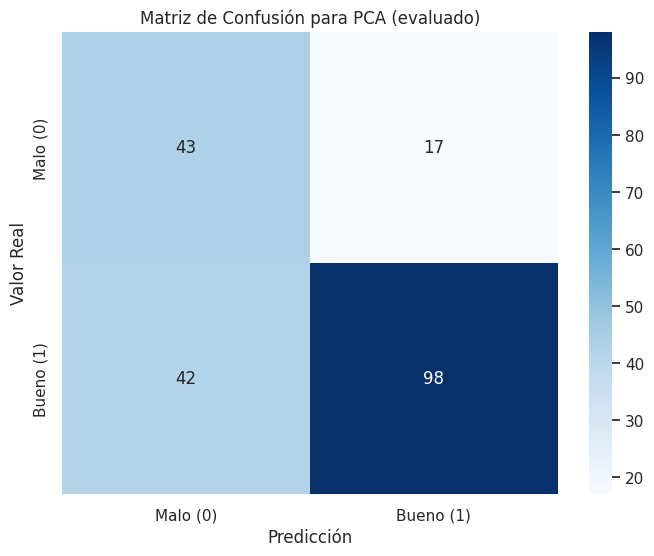

In [ ]:
# Identificar el mejor modelo basándose en la tabla comparativa
best_model_name = "PCA (evaluado)"
best_model_metrics = model_metrics.get(best_model_name)

if best_model_metrics is None:
    print(f"No se encontraron métricas para el modelo '{best_model_name}'. Por favor, verifica el nombre.")
else:
    print(f"\nGenerando gráficas para el mejor modelo: {best_model_name}")

    y_pred = best_model_metrics['y_pred_obj']
    cm = best_model_metrics['confusion_matrix_obj']
    model_instance_for_plots = svc_pca # Asignar la instancia del modelo entrenado

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Malo (0)', 'Bueno (1)'],
                yticklabels=['Malo (0)', 'Bueno (1)'])
    plt.title(f'Matriz de Confusión para {best_model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()